# Методы машинного обучения. 
## Лабораторная работа №6
### Анализ социологического исследования.
В Файле данные содержатся результат опроса населения о его условиях существования. Переменные разбиты на 2 класса - "Признаки состояния" - это субъективная оценка населения своего бытия и "Признаки причины" - объектные количественные признаки, оценивающие жизнедеятельность индивида и социума, в котором он проживает.
К признакам состояния относятся:

1.	Оценка благополучия
2.	Оценка социальной поддержки
3.	Ожидаемая продолжительность здоровой жизни
4.	Свобода граждан самостоятельно принимать жизненно важные решения
5.	Индекс Щедрости
6.	Индекс отношения к коррупции
7.	Оценка риска безработицы
8.	Индекс кредитного оптимизма
9.	Индекс страха социальных конфликтов
10.	Индекс семьи
11.	Индекс продовольственной безопасности
12.	Чувство технологического прогресса
13.	Чувство неравенства доходов в обществе

К индивидуальным признакам причины относятся:
1.	Среднегодовой доход, тыс. в долларах
2.	Объем потребленного алкоголя в год, л.
3.	Количество членов семьи
4.	Количество лет образования
5.	Доля от дохода семьи которая тратится на продовольствие, %

К общественным признакам причины относятся:
1.	Коэффициент Джини сообщества (Показатель степени расслоения общества по какому-либо социальному признаку. Одними из ключевых признаков, по которым рассчитывается коэффициент Джини, является уровень доходов и активов домохозяйств. Показатель может варьироваться в диапазоне от 0 до 1, и чем больше его значение, тем большее расслоение общества он отражает.)
2.	Издержки сообщества на окружающую среду, млн. долларов
3.	Охват беспроводной связи в сообществе, %
4.	Количество смертей от вирусных и респираторных заболеваний в сообществе, тыс. человек
5.	Волатильность потребительских цен в сообществе

Индивидуальные показатели характеризуют непосредственно индивида, общественные - сообщество в котором он проживает. В выборке могут присутствовать по несколько человек из одного сообщества. Все их общественные характеристики таким образом будут совпадать.
Также в данных присутствует интегральная характеристика удовлетворенности человека жизнью - для ее описания используется шкала Кантрила (см. рисунок 1)

Субъективные показатели качества жизни
Шкала Кантрила (The Cantril Scale) – простая визуальная шкала, которая позволяет оценить общую удовлетворенность жизнью.

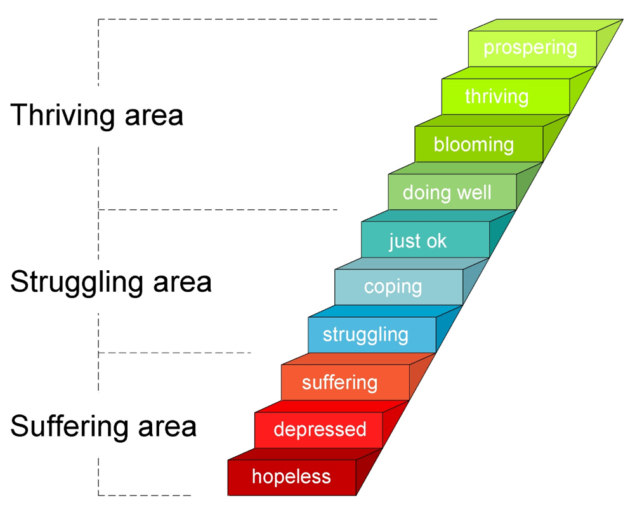
Рисунок 1. Шкала Кантрила.

Prospering – Процветающий/благоденствующий

Thriving – Преуспевающий

Blooming – Расцветающий

Doing well – Дела идут хорошо

Just Ok – Просто нормально

Coping – Справляющийся

Struggling – Столкнувшийся с трудностями/борющийся

Suffering – Страдающий

Depressed – Депрессивный

Hopeless – Безнадежный


Задание:

- Определить какие из признаков состояния наиболее сильно связаны с интегральной оценкой счастья (благополучия) респондента.
- Определить, как влияют признаки причины на наиболее важные признаки состояния.
- Пользуясь найденными закономерностями спрогнозировать попадание респондентов, у которых интегральная характеристика отмечена как "Неизвестно", в укрупненные группы шкалы Кантрила.

In [166]:
import pandas as pd

data = pd.read_excel("data/ЛР6_Полные_данные.xlsx", engine='openpyxl')  

In [167]:
data.head()

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе,Ощущаемое.счастье
0,Респондент 1,Сообщество 480,21.350,62,4,5,65,0.608084,197.16,0.330140,...,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0,Depressed
1,Респондент 2,Сообщество 130,622.613,30,7,21,39,0.369140,297.10,0.580329,...,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0,Blooming
2,Респондент 3,Сообщество 156,400.896,45,2,8,45,0.345094,305.32,0.624832,...,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0,Just ok
3,Респондент 4,Сообщество 69,375.950,56,5,10,68,0.635868,78.78,0.240157,...,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0,Depressed
4,Респондент 5,Сообщество 330,925.782,39,6,18,38,0.787911,93.35,0.229719,...,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0,Blooming


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 26 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Респондент                                                                             36000 non-null  object 
 1   Сообщество                                                                             36000 non-null  object 
 2   Среднегодовой.доход,.тыс..$                                                            36000 non-null  float64
 3   Объем.потребленного.алкоголя.в.год,.л.                                                 36000 non-null  int64  
 4   Количество.членов.семьи                                                                36000 non-null  int64  
 5   Количество.лет.образования                                                

In [169]:
data.describe()

,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%","Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек",Волатильность.потребительских.цен.в.сообществе,...,Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,340.636416,51.230806,4.948806,13.692250,48.251472,0.572049,177.470434,0.446942,12.365640,3.474593,...,50.634600,50.124467,50.357500,49.870633,47.511667,50.301733,29.725900,50.239733,43.426100,50.719533
std,268.118668,12.218932,3.027117,5.856553,13.008347,0.280250,116.448698,0.258823,9.071492,2.179064,...,28.594487,28.583670,28.621848,17.598383,18.608749,28.559791,15.142277,28.477918,18.745975,28.718251
min,7.919000,10.000000,1.000000,0.000000,20.000000,-0.049854,0.000000,0.100000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,122.377750,43.000000,2.000000,9.000000,39.000000,0.333659,66.300000,0.202458,2.890000,1.746443,...,26.000000,25.000000,26.000000,37.000000,33.000000,26.000000,18.000000,25.000000,28.000000,26.000000
50%,264.020500,50.000000,4.000000,13.000000,47.000000,0.638293,160.110000,0.378335,12.200000,3.727851,...,51.000000,50.000000,50.000000,50.000000,46.000000,50.000000,28.000000,50.000000,41.000000,50.000000
75%,489.920250,60.000000,7.000000,19.000000,62.000000,0.823651,301.130000,0.691458,13.320000,5.525685,...,76.000000,75.000000,75.000000,63.000000,62.000000,75.000000,40.000000,75.000000,58.000000,76.000000
max,1534.666000,85.000000,12.000000,30.000000,80.000000,1.012268,400.000000,0.950000,35.000000,7.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [170]:
# # Построение scatter plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=data['Ощущаемое.счастье'], y=data['Респондент'])
# plt.title('Scatter plot ')
# plt.xlabel('Ощущаемое.счастье')
# plt.ylabel('Респондент')
# plt.show()

In [171]:
# Оставляем только респондентов с индивидуальной характеристикой "Неизвестно"
data_cleaned = data.dropna(subset=['Оценка.социальной.поддержки', 'Индекс.кредитного.оптимизма', 
                               'Чувство.технологического.прогресса', 'Оценка.риска.безработицы', 
                               'Индекс.семьи', 'Ощущаемое.счастье'], how='any')
data_unknown = data[data['Ощущаемое.счастье'] == 'Неизвестно']

# Проверка, сколько респондентов осталось после очистки
print("Количество респондентов после предварительной обработки данных:", len(data_cleaned))
print("Количество респондентов с 'Ощущаемое.счастье' == 'Неизвестно':", len(data_unknown))
data_unknown = data_unknown.dropna(axis=1)
data_unknown

Количество респондентов после предварительной обработки данных: 30000
Количество респондентов с 'Ощущаемое.счастье' == 'Неизвестно': 6000


,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%","Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек",Волатильность.потребительских.цен.в.сообществе,Ощущаемое.счастье
6,Респондент 7,Сообщество 494,833.042,34,2,18,38,0.291490,296.46,0.676323,2.69,5.617298,Неизвестно
14,Респондент 15,Сообщество 206,101.207,65,4,4,69,0.070392,310.57,0.841053,2.34,6.443787,Неизвестно
20,Респондент 21,Сообщество 56,627.500,51,1,13,45,0.897229,40.58,0.143282,24.12,0.550675,Неизвестно
32,Респондент 33,Сообщество 261,93.401,50,3,10,48,0.376128,298.07,0.500573,12.71,5.066817,Неизвестно
33,Респондент 34,Сообщество 405,715.802,39,3,24,34,0.000480,369.99,0.947781,1.53,6.758049,Неизвестно
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35978,Респондент 35979,Сообщество 264,360.371,38,6,20,36,0.340375,248.53,0.604692,11.67,5.273648,Неизвестно
35981,Респондент 35982,Сообщество 302,745.104,45,6,13,44,0.186150,311.63,0.848319,3.08,6.499645,Неизвестно
35991,Респондент 35992,Сообщество 525,173.444,72,1,5,67,0.364146,246.84,0.532461,12.97,5.360152,Неизвестно
35996,Респондент 35997,Сообщество 384,373.757,48,1,8,50,0.620469,144.79,0.385055,11.87,3.633531,Неизвестно


In [172]:
import numpy as np

# Вычисление корреляции между признаками состояния и интегральной оценко

features_state = ['Оценка.благополучия', 'Оценка.социальной.поддержки', 'Ожидаемая.продолжительность.здоровой.жизни',
                       'Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения', 'Индекс.Щедрости',
                       'Индекс.отношения.к.коррупции', 'Оценка.риска.безработицы', 'Индекс.кредитного.оптимизма',
                       'Индекс.страха.социальных.конфликтов', 'Индекс.семьи', 'Индекс.продовольственной.безопасности',
                       'Чувство.технологического.прогресса', 'Чувство.неравенства.доходов.в.обществе']

happiness_score = 'Ощущаемое.счастье'

# Создание словаря соответствия категорий счастья числовым значениям
happiness_mapping = {
    'Prospering': 9,
    'Thriving': 8,
    'Blooming': 7,
    'Doing well': 6,
    'Just ok': 5,
    'Coping': 4,
    'Strugglng': 3,
    'Suffering': 2,
    'Depressed': 1,
    'Hopeless': 0,
    'Неизвестно': np.nan  # Заменяем "Неизвестно" на NaN
}

# Замена значений в столбце "Ощущаемое.счастье" с помощью словаря
data_cleaned['Ощущаемое.счастье'] = data_cleaned['Ощущаемое.счастье'].map(happiness_mapping)

# Вычисление матрицы корреляции
correlation_matrix = data_cleaned[features_state + [happiness_score]].corr()
correlation_matrix

C:\Users\AlexB\AppData\Local\Temp\ipykernel_5428\2091586299.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Ощущаемое.счастье'] = data_cleaned['Ощущаемое.счастье'].map(happiness_mapping)


,Оценка.благополучия,Оценка.социальной.поддержки,Ожидаемая.продолжительность.здоровой.жизни,Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе,"Охват.беспроводной.связи.в.сообществе,.%",Ощущаемое.счастье
Оценка.благополучия,1.000000,-0.003190,0.003790,-0.002030,-0.002374,0.000067,0.000244,-0.005248,-0.003344,-0.007825,-0.006380,-0.002749,0.008189,-0.007005,-0.002090
Оценка.социальной.поддержки,-0.003190,1.000000,0.002238,-0.003124,0.001350,0.002823,-0.830897,0.675428,0.000236,0.706684,-0.000522,0.904461,-0.004026,0.366258,0.894181
Ожидаемая.продолжительность.здоровой.жизни,0.003790,0.002238,1.000000,-0.002444,0.002597,0.000987,-0.000023,0.001048,-0.000325,-0.004874,0.000491,-0.001556,-0.014403,0.004231,-0.000286
Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения,-0.002030,-0.003124,-0.002444,1.000000,0.002683,-0.006540,-0.000372,-0.000600,-0.011285,-0.001003,0.009634,-0.000836,0.008080,-0.002113,-0.002882
Индекс.Щедрости,-0.002374,0.001350,0.002597,0.002683,1.000000,-0.003470,0.000806,0.002658,-0.003010,0.004943,0.000949,0.002859,0.001183,0.002130,0.001909
Индекс.отношения.к.коррупции,0.000067,0.002823,0.000987,-0.006540,-0.003470,1.000000,-0.002106,0.001334,-0.000946,0.002072,-0.006352,0.000657,0.004358,-0.002089,0.000545
Оценка.риска.безработицы,0.000244,-0.830897,-0.000023,-0.000372,0.000806,-0.002106,1.000000,-0.618870,-0.000050,-0.587966,-0.000844,-0.843529,0.000059,-0.190191,-0.837481
Индекс.кредитного.оптимизма,-0.005248,0.675428,0.001048,-0.000600,0.002658,0.001334,-0.618870,1.000000,-0.004724,0.664524,0.005845,0.616151,-0.005602,0.852164,0.779343
Индекс.страха.социальных.конфликтов,-0.003344,0.000236,-0.000325,-0.011285,-0.003010,-0.000946,-0.000050,-0.004724,1.000000,0.005072,0.001083,0.001358,0.007757,-0.006133,0.002262
Индекс.семьи,-0.007825,0.706684,-0.004874,-0.001003,0.004943,0.002072,-0.587966,0.664524,0.005072,1.000000,0.000615,0.842021,-0.004123,0.509573,0.802395


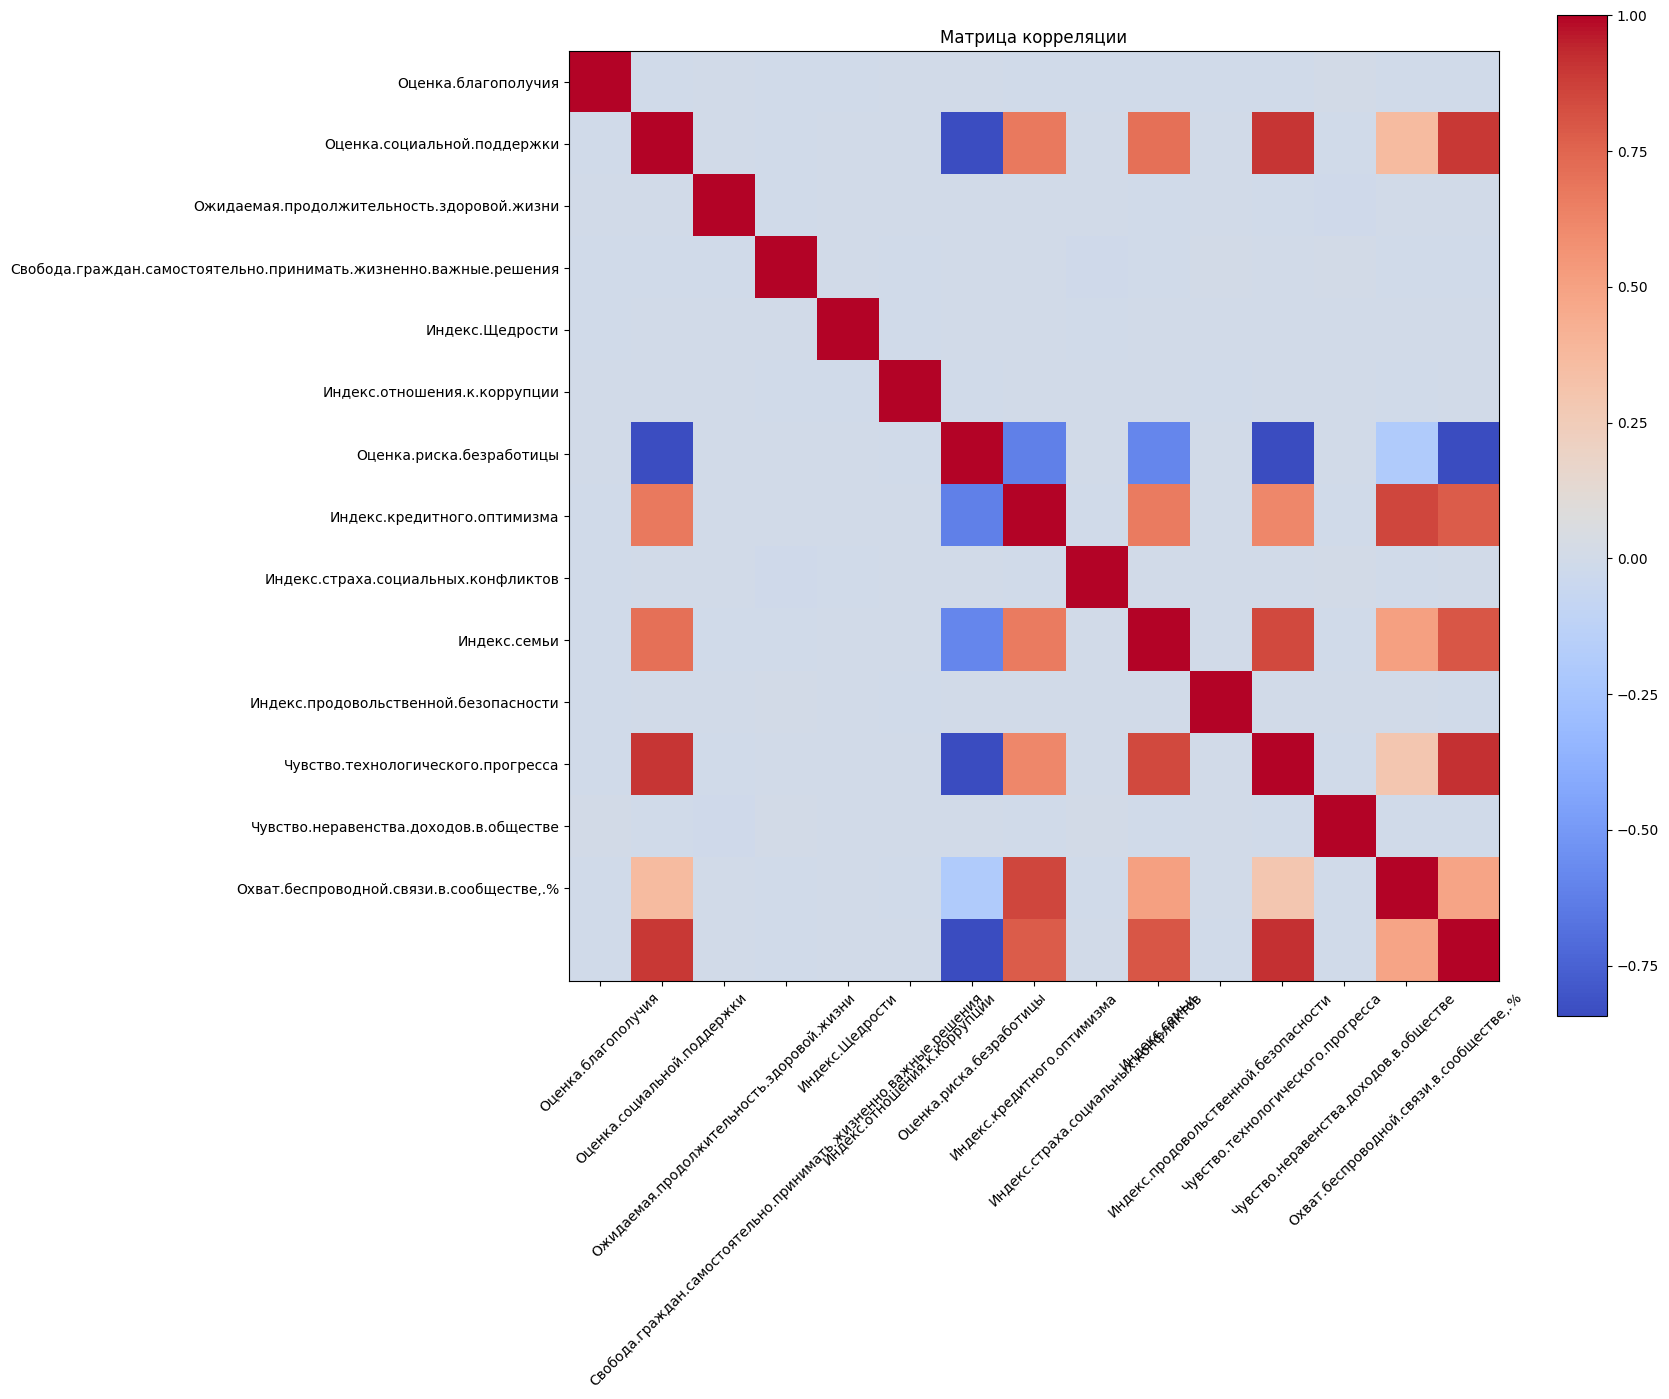

In [173]:
# Визуализация матрицы корреляции
plt.figure(figsize=(15, 13))
plt.title('Матрица корреляции')
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.xticks(np.arange(len(features_state)), features_state, rotation=45)
plt.yticks(np.arange(len(features_state)), features_state)
plt.colorbar()
plt.show()

In [174]:
# Вывод признаков, наиболее коррелирующих с интегральной оценкой счастья
top_corr_features = correlation_matrix[happiness_score].abs().sort_values(ascending=False).drop(happiness_score).index

print("Признаки, наиболее коррелирующие с интегральной оценкой счастья:")
print(top_corr_features)

Признаки, наиболее коррелирующие с интегральной оценкой счастья:
Index(['Чувство.технологического.прогресса', 'Оценка.социальной.поддержки',
       'Оценка.риска.безработицы', 'Индекс.семьи',
       'Индекс.кредитного.оптимизма',
       'Охват.беспроводной.связи.в.сообществе,.%',
       'Чувство.неравенства.доходов.в.обществе',
       'Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения',
       'Индекс.страха.социальных.конфликтов', 'Оценка.благополучия',
       'Индекс.Щедрости', 'Индекс.продовольственной.безопасности',
       'Индекс.отношения.к.коррупции',
       'Ожидаемая.продолжительность.здоровой.жизни'],
      dtype='object')


In [175]:
# важнын признаки состояния
important_features_state = data_cleaned[['Чувство.технологического.прогресса', 'Оценка.социальной.поддержки',
       'Оценка.риска.безработицы', 'Индекс.семьи',
       'Индекс.кредитного.оптимизма']]

features_reason = data_cleaned[['Среднегодовой.доход,.тыс..$', 'Объем.потребленного.алкоголя.в.год,.л.', 'Количество.членов.семьи',
                       'Количество.лет.образования', 'Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%']]

In [176]:
# Создание модели линейной регрессии
model = LinearRegression()
model.fit(features_reason, important_features_state)

# Вывод коэффициентов влияния признаков причины на признаки состояния
coefficients = pd.DataFrame({'Признак состояния': important_features_state.columns, 'Коэффициент': model.coef_[0]})
print(coefficients)

                    Признак состояния  Коэффициент
0  Чувство.технологического.прогресса     0.027091
1         Оценка.социальной.поддержки     0.001014
2            Оценка.риска.безработицы    -0.000532
3                        Индекс.семьи     2.177511
4         Индекс.кредитного.оптимизма     0.004675


In [177]:
data_unknown_new = data_unknown.dropna(axis=1)
data_unknown_new

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%","Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек",Волатильность.потребительских.цен.в.сообществе,Ощущаемое.счастье
6,Респондент 7,Сообщество 494,833.042,34,2,18,38,0.291490,296.46,0.676323,2.69,5.617298,Неизвестно
14,Респондент 15,Сообщество 206,101.207,65,4,4,69,0.070392,310.57,0.841053,2.34,6.443787,Неизвестно
20,Респондент 21,Сообщество 56,627.500,51,1,13,45,0.897229,40.58,0.143282,24.12,0.550675,Неизвестно
32,Респондент 33,Сообщество 261,93.401,50,3,10,48,0.376128,298.07,0.500573,12.71,5.066817,Неизвестно
33,Респондент 34,Сообщество 405,715.802,39,3,24,34,0.000480,369.99,0.947781,1.53,6.758049,Неизвестно
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35978,Респондент 35979,Сообщество 264,360.371,38,6,20,36,0.340375,248.53,0.604692,11.67,5.273648,Неизвестно
35981,Респондент 35982,Сообщество 302,745.104,45,6,13,44,0.186150,311.63,0.848319,3.08,6.499645,Неизвестно
35991,Респондент 35992,Сообщество 525,173.444,72,1,5,67,0.364146,246.84,0.532461,12.97,5.360152,Неизвестно
35996,Респондент 35997,Сообщество 384,373.757,48,1,8,50,0.620469,144.79,0.385055,11.87,3.633531,Неизвестно


In [182]:
# Подготовка данных
# Здесь вы можете обработать пропущенные значения признаков причины для респондентов с недостающими данными

# Выбранный признак состояния для предсказания
selected_feature = 'Ощущаемое.счастье'

# Признаки причины для предсказания
cause_features = ['Среднегодовой.доход,.тыс..$', 'Объем.потребленного.алкоголя.в.год,.л.', 'Количество.членов.семьи',
                       'Количество.лет.образования', 'Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%']

# Предсказание значений признака состояния для респондентов с недостающими данными
predicted_happiness = model.predict(data_unknown_new[cause_features])

# Добавление предсказанных значений в данные
data_unknown_new[selected_feature] = predicted_happiness
data_unknown_new

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%","Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек",Волатильность.потребительских.цен.в.сообществе,Ощущаемое.счастье
6,Респондент 7,Сообщество 494,833.042,34,2,18,38,0.291490,296.46,0.676323,2.69,5.617298,66.114918
14,Респондент 15,Сообщество 206,101.207,65,4,4,69,0.070392,310.57,0.841053,2.34,6.443787,15.978869
20,Респондент 21,Сообщество 56,627.500,51,1,13,45,0.897229,40.58,0.143282,24.12,0.550675,49.709506
32,Респондент 33,Сообщество 261,93.401,50,3,10,48,0.376128,298.07,0.500573,12.71,5.066817,28.719616
33,Респондент 34,Сообщество 405,715.802,39,3,24,34,0.000480,369.99,0.947781,1.53,6.758049,75.989668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35978,Респондент 35979,Сообщество 264,360.371,38,6,20,36,0.340375,248.53,0.604692,11.67,5.273648,57.657365
35981,Респондент 35982,Сообщество 302,745.104,45,6,13,44,0.186150,311.63,0.848319,3.08,6.499645,52.882103
35991,Респондент 35992,Сообщество 525,173.444,72,1,5,67,0.364146,246.84,0.532461,12.97,5.360152,20.112700
35996,Респондент 35997,Сообщество 384,373.757,48,1,8,50,0.620469,144.79,0.385055,11.87,3.633531,31.968118


In [189]:
# Разделение данных на обучающую и тестовую выборки
X = data[selected_features]
y = data['Интегральная оценка счастья']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели (пример с логистической регрессией)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе,Ощущаемое.счастье
0,Респондент 1,Сообщество 480,21.350,62,4,5,65,0.608084,197.16,0.330140,...,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0,1.0
1,Респондент 2,Сообщество 130,622.613,30,7,21,39,0.369140,297.10,0.580329,...,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0,7.0
2,Респондент 3,Сообщество 156,400.896,45,2,8,45,0.345094,305.32,0.624832,...,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0,5.0
3,Респондент 4,Сообщество 69,375.950,56,5,10,68,0.635868,78.78,0.240157,...,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0,1.0
4,Респондент 5,Сообщество 330,925.782,39,6,18,38,0.787911,93.35,0.229719,...,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35993,Респондент 35994,Сообщество 450,458.691,47,1,14,50,0.356139,260.35,0.497796,...,14.0,75.0,39.0,66.0,67.0,39.0,71.0,51.0,48.0,5.0
35994,Респондент 35995,Сообщество 567,418.492,54,2,11,47,0.841676,21.94,0.173420,...,32.0,90.0,50.0,30.0,19.0,26.0,32.0,33.0,7.0,2.0
35995,Респондент 35996,Сообщество 318,412.715,46,3,11,50,0.921816,59.51,0.227329,...,14.0,80.0,53.0,30.0,35.0,24.0,29.0,33.0,11.0,2.0
35997,Респондент 35998,Сообщество 331,374.882,38,1,18,39,0.498873,207.14,0.495535,...,10.0,76.0,27.0,63.0,96.0,35.0,58.0,55.0,2.0,8.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Разделение данных на обучающий и тестовый наборы
train_data = data[data['Ощущаемое.счастье'] != 'Неизвестно']
test_data = data[data['Ощущаемое.счастье'] == 'Неизвестно']

# Выделение признаков и целевой переменной
features_group1 = ['feature1', 'feature2', 'feature3']  # Признаки состояния
features_group2 = ['feature4', 'feature5']  # Индивидуальные признаки причины
features_group3 = ['feature6', 'feature7']  # Общественные признаки причины
target = 'Happiness_Label'

X_train = train_data[features_group1 + features_group2 + features_group3]
y_train = train_data[target]
X_test = test_data[features_group2 + features_group3]

# Обучение модели
model = RandomForestRegressor()  # Может потребоваться настройка параметров
model.fit(X_train, y_train)

# Прогнозирование меток счастья для тестовых данных
predicted_happiness = model.predict(X_test)

# Добавление прогнозов в исходные данные
test_data['Predicted_Happiness'] = predicted_happiness

# Вывод результатов
print(test_data[['Person_ID', 'Predicted_Happiness']])


In [178]:
 data_for_prediction = data_unknown_new[['Чувство.технологического.прогресса', 'Оценка.социальной.поддержки',
       'Оценка.риска.безработицы', 'Индекс.семьи',
       'Индекс.кредитного.оптимизма','Среднегодовой.доход,.тыс..$', 'Объем.потребленного.алкоголя.в.год,.л.', 'Количество.членов.семьи',
                       'Количество.лет.образования', 'Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%', 	'Респондент',	'Сообщество', 'Ощущаемое.счастье']]

KeyError: "['Чувство.технологического.прогресса', 'Оценка.социальной.поддержки', 'Оценка.риска.безработицы', 'Индекс.семьи', 'Индекс.кредитного.оптимизма'] not in index"

In [148]:

# Прогнозирование признаков состояния для "Неизвестных" респондентов
predicted_state = model.predict(data_unknown_new)

# Вывод прогнозируемых признаков состояния
predicted_state_df = pd.DataFrame(predicted_state, columns=features_state.columns)
print(predicted_state_df)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Волатильность.потребительских.цен.в.сообществе
- Издержки.сообщества.на.окружающую.среду,.млн..$
- Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек
- Коэффициент.Джини.сообщества
- Охват.беспроводной.связи.в.сообществе,.%
- ...


In [32]:
from sklearn.linear_model import LinearRegression


# Предобработка данных
data = data.dropna()  # Удаление строк с отсутствующими значениями

# Разделение данных на признаки причины и признаки состояния
X_cause = data[['Среднегодовой.доход,.тыс..$', 'Объем.потребленного.алкоголя.в.год,.л.', 'Количество.членов.семьи',
                       'Количество.лет.образования', 'Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%']]
y_state = data[['Оценка.благополучия', 'Оценка.социальной.поддержки', 'Ожидаемая.продолжительность.здоровой.жизни',
                       'Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения', 'Индекс.Щедрости',
                       'Индекс.отношения.к.коррупции', 'Оценка.риска.безработицы', 'Индекс.кредитного.оптимизма',
                       'Индекс.страха.социальных.конфликтов', 'Индекс.семьи', 'Индекс.продовольственной.безопасности',
                       'Чувство.технологического.прогресса', 'Чувство.неравенства.доходов.в.обществе']]
print(len(X_cause.columns))
print(len(y_state.columns))
# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели
model.fit(X_cause, y_state)

# Получение коэффициентов регрессии
coefficients = model.coef_
print(coefficients)


5
13
[[-1.13589056e-03  1.75482774e-02  1.54865992e-02  3.52350216e-02
  -1.85819993e-02]
 [ 1.13678932e-03 -3.36394043e-01  4.03405383e-02  1.42658130e+00
  -3.49383556e-01]
 [-1.20440343e-03  9.18710948e-02  4.77126641e-02 -6.33245718e-03
  -1.03134351e-01]
 [ 2.03632673e-04  4.00887332e-02 -2.84996562e-02  2.43610098e-02
  -1.91228720e-02]
 [ 3.84423752e-04 -1.26461287e-02  4.06964267e-02 -4.99160660e-03
   1.22587001e-02]
 [ 4.23685216e-04  1.41100938e-02 -4.38402753e-02 -3.47599358e-02
  -2.39509586e-02]
 [ 1.24047034e-05 -9.17239462e-04  2.60871288e+00 -1.88446000e+00
   3.70583462e-01]
 [ 5.53012317e-04  5.90177032e-03 -1.65291739e+00  1.25888780e+00
   1.31332335e-02]
 [ 1.31285362e-03 -2.34981936e-02 -1.79236888e-02 -8.34381300e-02
  -2.57335979e-03]
 [ 4.48163493e-02 -1.15030740e-01 -1.82820660e-03  1.01621225e-02
   5.36908551e-03]
 [-3.54590318e-04 -1.93065876e-02 -3.56707967e-02  2.21176578e-02
   2.77588287e-02]
 [ 2.70910500e-02  1.01391371e-03 -5.31949681e-04  2.1775110

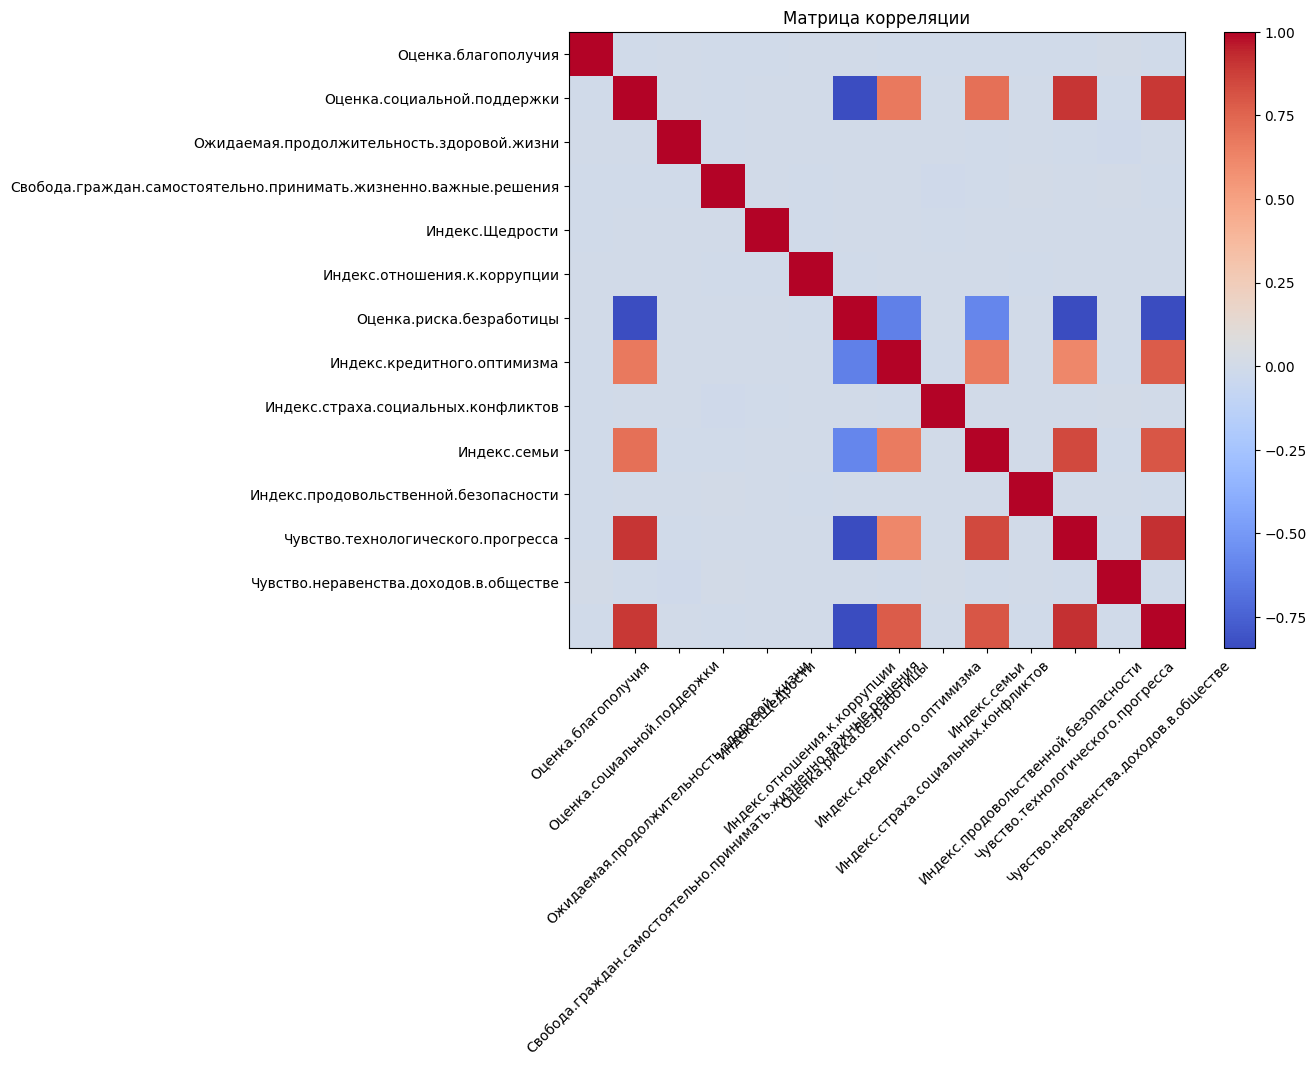

In [7]:
import numpy as np

# Выделение признаков состояния и интегральной оценки счастья
features_state = ['Оценка.благополучия', 'Оценка.социальной.поддержки', 'Ожидаемая.продолжительность.здоровой.жизни',
                       'Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения', 'Индекс.Щедрости',
                       'Индекс.отношения.к.коррупции', 'Оценка.риска.безработицы', 'Индекс.кредитного.оптимизма',
                       'Индекс.страха.социальных.конфликтов', 'Индекс.семьи', 'Индекс.продовольственной.безопасности',
                       'Чувство.технологического.прогресса', 'Чувство.неравенства.доходов.в.обществе', 'Охват.беспроводной.связи.в.сообществе,.%']
happiness_score = 'Ощущаемое.счастье'

# Создание словаря соответствия категорий счастья числовым значениям
happiness_mapping = {
    'Prospering': 9,
    'Thriving': 8,
    'Blooming': 7,
    'Doing well': 6,
    'Just ok': 5,
    'Coping': 4,
    'Strugglng': 3,
    'Suffering': 2,
    'Depressed': 1,
    'Hopeless': 0,
    'Неизвестно': np.nan  # Заменяем "Неизвестно" на NaN
}

# Замена значений в столбце "Ощущаемое.счастье" с помощью словаря
data['Ощущаемое.счастье'] = data['Ощущаемое.счастье'].map(happiness_mapping)

# Вычисление матрицы корреляции
correlation_matrix = data[features_state + [happiness_score]].corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
plt.title('Матрица корреляции')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.xticks(np.arange(len(features_state)), features_state, rotation=45)
plt.yticks(np.arange(len(features_state)), features_state)
plt.colorbar()
plt.show()

In [8]:
data.columns

Index(['Респондент', 'Сообщество', 'Среднегодовой.доход,.тыс..$',
       'Объем.потребленного.алкоголя.в.год,.л.', 'Количество.членов.семьи',
       'Количество.лет.образования',
       'Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%',
       'Коэффициент.Джини.сообщества',
       'Издержки.сообщества.на.окружающую.среду,.млн..$',
       'Охват.беспроводной.связи.в.сообществе,.%',
       'Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек',
       'Волатильность.потребительских.цен.в.сообществе', 'Оценка.благополучия',
       'Оценка.социальной.поддержки',
       'Ожидаемая.продолжительность.здоровой.жизни',
       'Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения',
       'Индекс.Щедрости', 'Индекс.отношения.к.коррупции',
       'Оценка.риска.безработицы', 'Индекс.кредитного.оптимизма',
       'Индекс.страха.социальных.конфликтов', 'Индекс.семьи',
       'Индекс.продовольственной.безопасности',
       'Чувство.технологичес

In [11]:
# Предобработка данных
data = data.dropna()  # Удаление строк с отсутствующими значениями

In [12]:
# Выделение признаков причины и признаков состояния
features_cause_individual = ['Среднегодовой.доход,.тыс..$', 'Объем.потребленного.алкоголя.в.год,.л.', 'Количество.членов.семьи',
                       'Количество.лет.образования', 'Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%']
features_cause_community = ['Коэффициент.Джини.сообщества', 'Издержки.сообщества.на.окружающую.среду,.млн..$', 
                            'Охват.беспроводной.связи.в.сообществе,.%', 'Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек',
                           'Волатильность.потребительских.цен.в.сообществе']

# Анализ влияния признаков причины на признаки состояния (например, с использованием регрессии)
from sklearn.linear_model import LinearRegression

for state_feature in features_state:
    X = data[features_cause_individual + features_cause_community]
    y = data[state_feature]
    
    model = LinearRegression()
    model.fit(X, y)
    
    print(f'Признак состояния: {state_feature}')
    print('Коэффициенты регрессии:', model.coef_)
    print('Свободный член:', model.intercept_)
    print('\n')


Признак состояния: Оценка.благополучия
Коэффициенты регрессии: [-1.06278540e-03  1.80515201e-02  1.68448766e-02  3.45104432e-02
 -1.84244583e-02 -2.49128838e+00 -6.31020605e-03 -2.75959494e+00
  4.54810415e-02  4.24226346e-01]
Свободный член: 52.17003200207125


Признак состояния: Оценка.социальной.поддержки
Коэффициенты регрессии: [ 8.40968523e-06 -3.50838859e-01  5.52234114e-04  1.43080680e+00
 -3.50566841e-01  1.43567607e-02 -6.72200758e-06  2.70857018e-02
 -9.56071810e-01  1.72154506e-03]
Свободный член: 82.37873990915024


Признак состояния: Ожидаемая.продолжительность.здоровой.жизни
Коэффициенты регрессии: [-1.23459988e-03  9.13877900e-02  4.66922050e-02 -6.01009682e-03
 -1.02940301e-01  1.51019403e+00 -8.12453520e-04  3.92739019e+00
 -3.95017389e-02 -3.30157975e-01]
Свободный член: 50.063911378998974


Признак состояния: Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения
Коэффициенты регрессии: [ 2.32811936e-04  4.04537671e-02 -2.74472528e-02  2.42223182e-02
 -1.91

In [13]:
# Выделение колонок для прогнозирования
predictors = features_state + features_cause_individual + features_cause_community

# Выделение данных с известной интегральной характеристикой
known_data = data.dropna(subset=[happiness_score])

X_known = known_data[predictors]
y_known = known_data[happiness_score]

# Обучение модели (например, случайный лес)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_known, y_known)

# Прогнозирование для данных с неизвестной интегральной характеристикой
unknown_data = data[data[happiness_score].isnull()]
X_unknown = unknown_data[predictors]

predicted_happiness = model.predict(X_unknown)

# Добавление прогнозов к данным
data.loc[data[happiness_score].isnull(), happiness_score] = predicted_happiness


ValueError: Found array with 0 sample(s) (shape=(0, 23)) while a minimum of 1 is required by RandomForestClassifier.